# Predicting Breast Cancer Using Logistic Regression

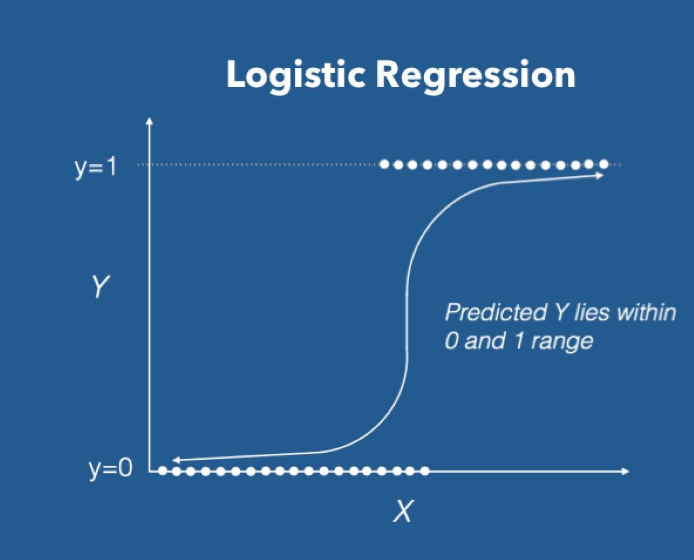

In [1]:
from IPython.display import Image
Image(filename = "cc.png", width = 600, height = 200)

# Background
Breast cancer is the second most common cancer and has the highest cancer death rate among women in the United States. Breast cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a tumor. A tumor does not mean cancer — can be benign (no breast cancer) or malignant (breast cancer). Tests such as an MRI, mammogram, ultrasound, and biopsy are commonly used to diagnose breast

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(f'Libraries have been imported! :)')

Libraries have been imported! :)


In [3]:
train = pd.read_csv('breastcancer.csv')
print(f'Preview:\n\n{train.head()}')

Preview:

           id                     name  radius  texture  perimeter    area  \
0    ID842302           Glynnis Munson     NaN    10.38     122.80  1001.0   
1    ID842517              Lana Behrer   20.57    17.77     132.90  1326.0   
2  ID84300903  Devondra Vanvalkenburgh   19.69    21.25     130.00  1203.0   
3  ID84348301          Glory Maravalle     NaN    20.38      77.58   386.1   
4  ID84358402           Mellie Mccurdy   20.29    14.34     135.10  1297.0   

   smoothness  compactness  concavity  symmetry  fractal_dimension  age  \
0     0.11840      0.27760     0.3001    0.2419            0.07871   35   
1     0.08474      0.07864     0.0869    0.1812            0.05667   27   
2     0.10960      0.15990     0.1974    0.2069            0.05999   31   
3     0.14250      0.28390     0.2414    0.2597            0.09744   49   
4     0.10030      0.13280     0.1980    0.1809            0.05883   20   

   diagnosis  
0          1  
1          1  
2          1  
3         

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) answers the “What are we dealing with?” question. EDA is where we try to understand our data first. We want to gain insights before messing around with it.

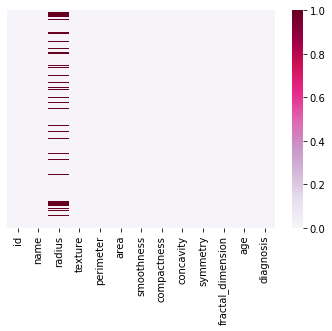

In [4]:
heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)
plt.show()

where:<br>
train.isnull() is checking for nulls in the train df<br>
yticklabels is not plotting train df column names to y-axis<br>
cbar is adding a color bar<br>
cmap is mapping data values to a color space<br>
vmin set 0 as the minimum for the color bar<br>
vmax set 1 as the maximum for the color bar<br>

This heat map is interpreted as the following:<br>
0 (white color) means we have a value<br>
1 (dark red color) means we have a null<br>
Looks like we only have nulls in the radius column! Not bad at all and easily fixable :)

# Visualization #2: Count Plot

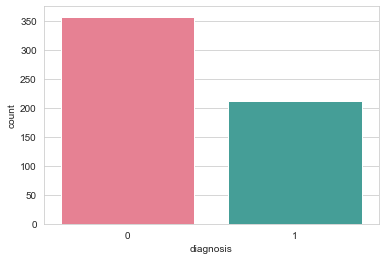

In [5]:
# a count plot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable
sns.set_style("whitegrid")
sns.countplot(data = train, x = 'diagnosis', palette = 'husl')

where:<br>
0 indicates no breast cancer<br>
1 indicates breast cancer

# Visualization #3: Histogram

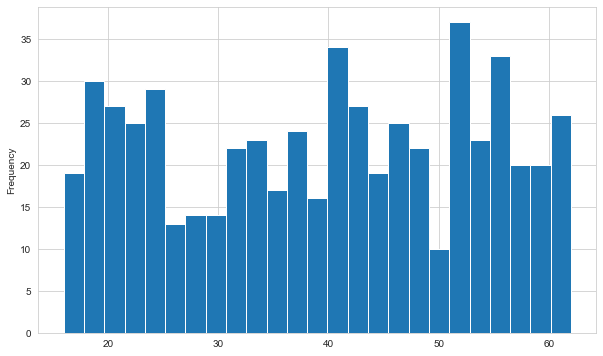

In [6]:
# let's check out the spread of ages using a histogram
train['age'].plot.hist(bins = 25, figsize = (10,6))

where:<br>
we are looking at the age column within the train df:<br>
bins are setting the number of class intervals:<br>
figsize(width, height) sets a figure object with a width of 10 inches and height of 6 inches

Data is not skewed and doesn’t have a distinct shape — doesn’t tell us too much. Let’s move on to cleaning our data.

### Data Cleaning
The missing data in the radius column needs to be filled in. We are going to do this by imputing the mean radius, not just dropping all null values. To impute a value simply means we are going to replace missing values with our newly calculated value. For our method specifically, it is referred to as mean imputation.

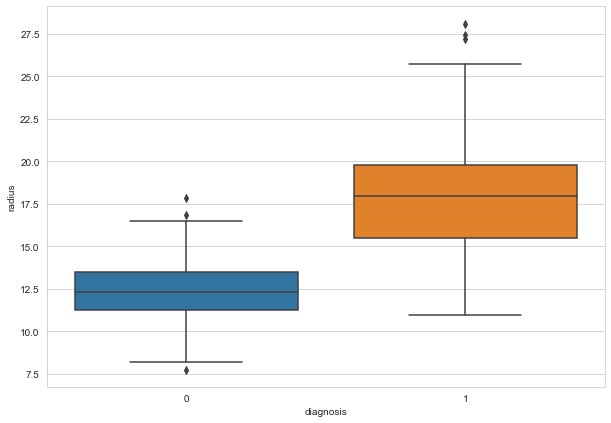

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "diagnosis", y = "radius", data = train)

Women who were diagnosed with breast cancer (diagnosis = 1) tend to have a higher tumor radius size, which is the distance from the center to the circumference of the tumor.

In [8]:
# calculate the average radius size by diagnosis (0 or 1)
train.groupby('diagnosis')["radius"].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

This is interpreted as…<br>
“Women who are not diagnosed with breast cancer have an average/mean tumor radius size of 12.34.”…<br>
“Women who are diagnosed with breast cancer have an average/mean tumor radius size of 17.89.”…<br>
Now that we have found our average tumor radius by diagnosis, let’s impute them into our missing (aka our null) values.…<br>

In [9]:
def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]
    
    # if value in radius column is null
    if pd.isnull(radius):
        
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17
        # if woman was not diagnosed with breast cancer
        else:
            return 12
    # when value in radius column is not null
    else:
        # return that same value
        return radius

In [10]:
train['radius'] = train[['radius', 'diagnosis']].apply(impute_radius, axis = 1)

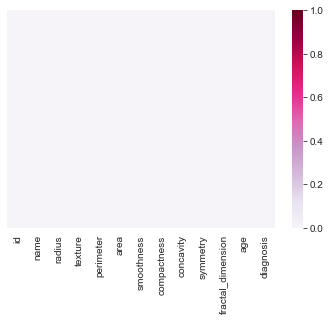

In [11]:
heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)
plt.show()

All rows that were missing data have now been imputed (aka substituted) with the average radius size, which was determined by whether the woman was diagnosed with breast cancer. No need to drop other columns or impute more missing values.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                   569 non-null object
name                 569 non-null object
radius               569 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
age                  569 non-null int64
diagnosis            569 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [13]:
train.drop(['id', 'name'], axis = 1, inplace = True)

In [14]:
train.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


# Build the Model

In [15]:
X = train.drop('diagnosis', axis = 1)
y = train['diagnosis']

In [16]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.91      0.93      0.92       105\n           1       0.89      0.85      0.87        66\n\n    accuracy                           0.90       171\n   macro avg       0.90      0.89      0.89       171\nweighted avg       0.90      0.90      0.90       171\n'

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[98,  7],
       [10, 56]], dtype=int64)

# Conclusion
We had 171 women in our test set. Out of the 105 women predicted to not have breast cancer, 7 women were classified as not having breast cancer when they actually did (Type I error). Out of the 66 women predicted to have breast cancer, 10 were classified as having breast cancer when they did not (Type II error). In a nut shell, our model was more or less 90% accurate.